# Übung 1

---

> 'Grundlagen der künstlichen Intelligenz' im Wintersemester 2024/2025
> 
> - T.T.-Prof. Benjamin Schäfer, benjamin.schaefer@kit.edu
> - Prof. Gerhard Neumann, gerhard.neumann@kit.edu

---

**Wichtig**: Dieses Übungsblatt wird nicht gewertet und soll euch helfen, euch mit Python, Jupyter, Pandas und Numpy vertraut zu machen. Außerdem bietet es euch
die Möglichkeit, technische Probleme zu erkennen.

- **Bitte ladet dieses Übungsblatt daher bei Ilias als Abgabe hoch, auch wenn ihr es nur teilweise (oder gar nicht) bearbeitet habt.**
- **Auf diese Weise könnt ihr technische Probleme finden und wir können sie gemeinsam in der ersten Saalübung lösen.**
- **Ab dem zweiten Übungsblatt erwarten wir, dass die technischen Probleme gelöst sind.**
- **Nutzt daher bitte diese Möglichkeit!**

### Übungsteam
- Philipp Dahlinger, philipp.dahlinger@kit.edu
- Nicolas Schreiber, nicolas.schreiber@kit.edu
- Ulrich Oberhofer, ulrich.oberhofer@kit.edu
- Sebastian Pütz, sebastian.puetz@kit.edu

# Gruppenabgabe
Die Übungsblätter können in Gruppen von bis zu **3 Studierenden** abgegeben werden. **Jede Person aus der Gruppe muss die finale Version der Abgabe über Ilias hochladen**, es genügt nicht, dass nur eine Person aus der Gruppe dies tut. Es ist prinzipiell möglich, im Laufe des Semesters sich einer neuen Gruppe anzuschließen, sollte sich die eigene Gruppe vorzeitig auflösen. Generell muss jede Gruppe muss ihre eigene Lösung hochladen, wir werden die Abgaben auf Duplikate überprüfen. 

Die Gruppen werden automatisch erfasst, **gebt deshalb die u-Kürzel eurer Gruppenmitglieder in die folgende Zelle ein.** Falls eure Gruppe nur aus 2 Studierenden besteht, oder ihr alleine abgibt, lasst die verbleibenden Felder frei. Hier ein Beispiel für eine Gruppe bestehend aus uabcd und uefgh:

*U-Kürzel der Gruppenmitglieder:*

*Mitglied 1: uabcd*

*Mitglied 2: uefgh*

*Mitglied 3:*

U-Kürzel der Gruppenmitglieder:

Mitglied 1: 

Mitglied 2: 

Mitglied 3: 


# Auto-grading

Wir nutzen ein auto-grading System, welches eure abgegebenen Jupyter Notebooks automatisch analysiert und über
hidden tests auf Richtigkeit prüft. Über diese Tests werden die Punkte bestimmt, die ihr für das Übungsblatt erhaltet.

Damit das auto-grading reibungslos funktioniert bitte folgende Dinge beachten:

- Vor dem Abgeben eines Notebooks bitte testen, dass alles von vorne bis hinten ohne Fehler durchläuft.
- Zellen, welche mit "### DO NOT CHANGE ###" markiert sind dürfen weder gelöscht noch bearbeitet werden
- Eure Lösung muss in die richtige Zelle (markiert mit "# YOUR CODE HERE") eingetragen werden.
    - (dabei natürlich den NotImplementedError löschen!)
- Es gibt potentiell scheinbar leere Zellen, die auch mit "### DO NOT CHANGE ###" markiert sind. Auch diese dürfen nicht bearbeitet oder gelöscht werden.
    - Falls dies doch gemacht wird, dann wird das automatische Grading nicht funktionieren und ihr erhaltet keine Punkte.
    - Wir werden hier strikt handeln und keine Ausnahmen machen, falls jemand doch Zellen verändert, die eindeutig als readonly markiert sind!
- Die Jupyter Notebooks haben inline Tests (für euch sichtbar), welche euer Ergebnis auf grobe Richtigkeit überprüfen.
    - Diese sind primär für euch, um Fehler zu erkennen und zu korrigieren.
    - Die inline Tests, die ihr im Notebook sehen könnt, sind allerdings nicht die Tests welche für das Grading verwendet werden!
    - Die inline Tests sind eine notwendige Bedingung, um beim Grading der Aufgabe Punkte zu erhalten!

## Einleitung
Wenn du mit Python nicht vertraut bist, empfehlen wir eines der folgenden Online-Tutorials:

* https://learnxinyminutes.com/docs/python/
* http://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
* https://www.learnpython.org/
* https://www.w3schools.com/python/
* https://automatetheboringstuff.com/

## Coronapandemie (nicht bewertet)

Um typische Datascience-Workflows in Python kennenzulernen analysieren wir hier kurz Falldaten zur Corona-Pandemie. Dazu laden wir zunächst einen historischen Datensatz über die Corona
Infektionen weltweit vom Europäischen Zentrum für die Prävention und
Kontrolle im Jahr 2020 ([link](https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx)) herunter.
Das können wir mit dem Python Package ``requests`` machen:

In [1]:
import os
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import scipy.optimize

In [2]:
data_url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"
data_file = "COVID-19-geographic-disbtribution-worldwide.xlsx"
if not os.path.exists(data_file):
    print("Downloading dataset ...")
    with open(data_file, "wb") as f:
        f.write(requests.get(data_url).content)
    print("Downloading dataset done.")

Nun laden wir den Datensatz mit ``pandas``, welches ein ``DataFrame`` Objekt erstellt. Wir schauen uns die ersten 5 Zeilen an:

In [3]:
corona_world = pd.read_excel(data_file)

In [4]:
corona_world.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


Das ``DataFrame`` Objekt erlaubt Zugriff auf die enthaltenen Daten über die Methoden .iloc (index-basierte Selektion) und .loc (name-basierte Selektion):

In [5]:
print(corona_world.index)
print(corona_world.columns)

print(corona_world.iloc[0:5,[0,5]])
print(corona_world.loc[0:5,["month"]])

RangeIndex(start=0, stop=61900, step=1)
Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')
     dateRep  deaths
0 2020-12-14       6
1 2020-12-13       9
2 2020-12-12      11
3 2020-12-11      10
4 2020-12-10      16
   month
0     12
1     12
2     12
3     12
4     12
5     12


Nun selektieren wir nur die Einträge welche zu Deutschland gehören. Mit ``corona_countries=="Germany"`` erhalten wir eine boolean Mask, welche wir auf `corona_world` anwenden können. Weiterhin selektieren wir nur columns, welche für uns relevant sind. Außerdem flippen wir die finalen numpy arrays, sodass diese von der Vergangenheit forwärts laufen.

In [6]:
# Select data
corona_countries = corona_world["countriesAndTerritories"]
print(corona_countries == "Germany")
corona_germany = corona_world[corona_countries == "Germany"]
corona_germany = corona_germany[[
    "dateRep", "cases", "deaths",
    "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"
]]
time_germany = corona_germany["dateRep"].values
cc_germany = corona_germany[
    "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"
].to_numpy()
time_germany = np.flip(time_germany)
cc_germany = np.flip(cc_germany)

0        False
1        False
2        False
3        False
4        False
         ...  
61895    False
61896    False
61897    False
61898    False
61899    False
Name: countriesAndTerritories, Length: 61900, dtype: bool


Wir visualisieren nun die 14-Tage-Inzidenz für Deutschland (`Cumulative_number_for_14_days_of_COVID-19_cases_per_100000`). Hierfür nutzen wir das Package ``matplotlib.pyplot``, welches wir in zukünftigen Aufgabenblättern noch oft nutzen werden. [Hier](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) findet sich ein guter Guide zu diesem Package.

In [7]:
# Date functionality
months = mdates.MonthLocator()  # every month

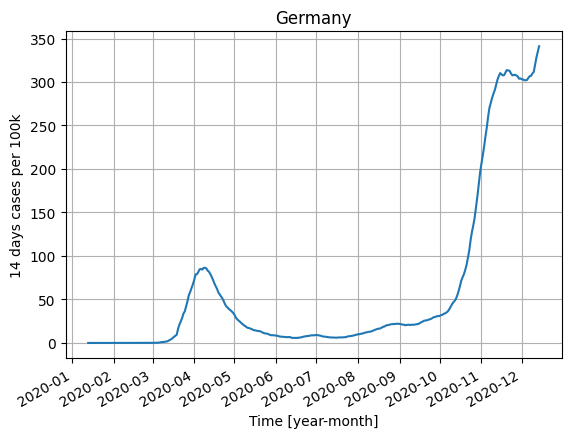

In [8]:
fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.title("Germany")
plt.ylabel("14 days cases per 100k")
plt.xlabel("Time [year-month]")
plt.show()

Nun folgen ein paar Aufgaben, die du selbst beantworten sollst.
Hierfür kannst du entweder das pandas dataframe und seine Operationen direkt verwenden,
oder die Daten konvertieren und mit `numpy` arbeiten. Versuche wenn möglich immer eingebaute
Funktionalitäten von `numpy` oder `pandas` zu nutzen, da diese deutlich schneller sind 
als pures Python.

Dokumentation findet sich hier: [numpy](https://numpy.org/doc/) und
[pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

**1.** Liste die Zahl der Todesfälle in Verbindung mit Covid-19 relativ zur mittleren Bevölkerungszahl (gemittelt über alle Einträge für das jeweilige Land) für jedes Land in 2020. Welches Land hat die höchste Todesrate? Welches die niedrigste?

Für diese Aufgabe bietet es sich an, die Ergebnisse in Dictionaries mit einem Key für jedes Land zu speichern. Du kannst dir weiterhin folgende möglicherweise hilfreichen Funktionen anschauen:

[pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started):
``.unique``, ``.groupby``, ``.mean``, ``.sum``, ``.sort_values``, ``.get_group`` and ``.from_dict``:

In [9]:
# Fülle die folgenden Objekte:

countries = [] # Liste aller Länder (jedes Land nur ein Mal)
population = {} # Durchschnitt der Bevölkerungszahl über alle Einträge für jedes Land
deaths = {} # Summe aller Todesfälle für jedes Land
rel_deaths = {} # Summe aller Todesfälle geteilt durch Bevölkerungszahl für jedes Land
country_max_mortality = "" # Welches Land hatte die höchste relative Todesrate?

### BEGIN SOLUTION
countries = corona_world["countriesAndTerritories"].unique()
groups = corona_world.groupby("countriesAndTerritories")
population = {x: groups.get_group(x)["popData2019"].mean() for x in countries}
deaths = {x: groups.get_group(x)["deaths"].sum() for x in countries}
rel_deaths = {x: deaths[x] / population[x] for x in countries}
sorted_countries = pd.DataFrame.from_dict(
    rel_deaths, orient="index"
).sort_values(0)
country_max_mortality = "Belgium"

sorted_countries
### END SOLUTION

,0
Seychelles,0.000000
New_Caledonia,0.000000
Eritrea,0.000000
Faroe_Islands,0.000000
Dominica,0.000000
...,...
Peru,0.001128
San_Marino,0.001480
Belgium,0.001567
Cases_on_an_international_conveyance_Japan,NaN


**2.** Nun möchten wir die kumulative Anzahl der Fälle (summierte Anzahl der Fälle bis zu einem Datum), die kumulative Anzahl der verstorbenen Fälle und die kumulative Anzahl der genesenen Fälle für Deutschland über der Zeit plotten.

Stelle sicher, dass die Daten die richtige Reihenfolge für eine kumulative Summe haben.

Tipp: Schau dir die Funktion ``np.cumsum`` an.

Tipp zum Bestimmen der kumulative Anzahl der genesenen Fälle:
Wir nehmen an, dass man nach 14 Tagen nach der Infektion / positivem Test entweder genesen oder verstorben ist.
Daher berechnen wir die kumulative Anzahl der genesenen Fälle, indem wir die Anzahl der kumulativen Fälle vor vierzehn Tagen minus der aktuellen kumulativen Anzahl der Todesfälle rechnen.

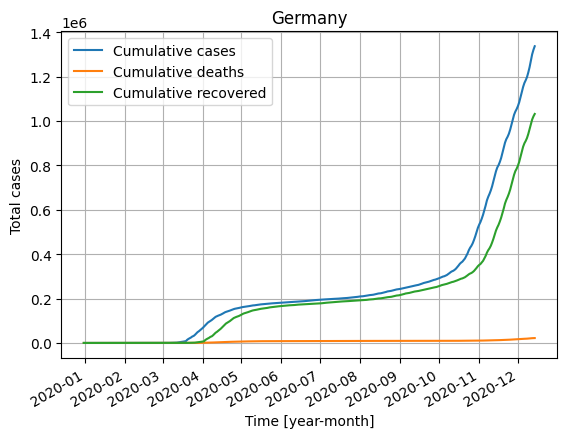

In [10]:
cum_death = np.array([])
cum_cases = np.array([])
cum_recov = np.array([])

### BEGIN SOLUTION
total_germany = np.flip(corona_germany["cases"].to_numpy())
death_germany = np.flip(corona_germany["deaths"].to_numpy())
cum_death = np.cumsum(death_germany)
cum_cases = np.cumsum(total_germany)

cum_recov = np.zeros_like(cum_cases)
cum_recov[14:] = cum_cases[0:-14] - cum_death[14:]

fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cum_cases, label="Cumulative cases")  # plot data
ax.plot(time_germany, cum_death, label="Cumulative deaths")  # plot data
ax.plot(time_germany, cum_recov, label="Cumulative recovered")  # plot data
ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.title("Germany")
plt.ylabel("Total cases")
plt.xlabel("Time [year-month]")
plt.legend()
plt.show()  # make plot
### END SOLUTION

Wir wollen nun analysieren, wie gut man mit einfachen Modellen den Verlauf der 
Pandemie im Spätjahr 2020 (nach 01.10.2020) in Deutschland vorhersagen kann.

**3.** Zunächst selektieren wir die Daten vom 01.08.2020 bis 01.10.2020 zum Fitten unserer Modelle. Beachte, dass wir hier numpy arrays vom Typ ``dtype="datetime64[ns]"`` verwenden. 

Wir müssen die passende Zeitperiode selektieren und dann durch ``np.timedelta64(1,"D")``, was dem Zeitraum eines Tages entspricht, teilen. Dann erhalten wir ein array, welches die Tage vom 01.08.2020 aufwärts zählt.

Als Testdaten selektieren wir alle Daten ab dem 01.08.2020, also auch über den 01.10.2020 hinaus.

In [11]:
date_start = datetime(2020, 8, 1)
date_stop = datetime(2020, 10, 1)
selection = np.logical_and(time_germany >= np.datetime64(date_start),
                           time_germany < np.datetime64(date_stop))

# Selektiere Daten
x_cases = np.array(time_germany[selection] - np.datetime64(date_start)) / np.timedelta64(1, "D")
y_cases = np.array(cc_germany)[selection]
x_test = time_germany[time_germany >= np.datetime64(date_start)]
x_test_days = (x_test - np.datetime64(date_start)) / np.timedelta64(1, "D")

Nun versuchen wir ein paar analytische Funktionen an die Daten zu fitten, wofür wir ``scipy.optimize.curve_fit`` verwenden. Falls der Fit nicht auf Anhieb konvergiert, versuche die bounds und den initial guess von Hand zu ändern.

Versuche die folgenden Ausdrücke. Implementiere diese zunächst mit der Hilfe von Funktionen wie ``np.square``, ``np.exp`` oder ``np.power`` etc.

* $f_1(x)= ax+b$
* $f_2(x)= c e^{a (x-b)}$
* $f_3(x)= a x^2 + b x + c$
* $f_4(x)= a x^3 + b x^2 + cx + d$
* $\dots$

In [12]:
# Funktionen, welche implementiert werden sollen:
def fun_1(x, a, b):
    return a * x + b


def fun_2(x, a, b, c):
    pass


def fun_3(x, a, b, c):
    pass


def fun_4(x, a, b, c, d):
    pass


# Du kannst auch eigene zusätzliche Ideen implementieren...

### BEGIN SOLUTION
def fun_1(x, a, b):
    return a * x + b


def fun_2(x, a, b, c):
    return c * np.exp(a * (x - b))


def fun_3(x, a, b, c):
    return np.square(x) * a + x * b + c


def fun_4(x, a, b, c, d):
    return a * np.power(x, 3) + np.power(x, 2) * b + c * x + d
### END SOLUTION

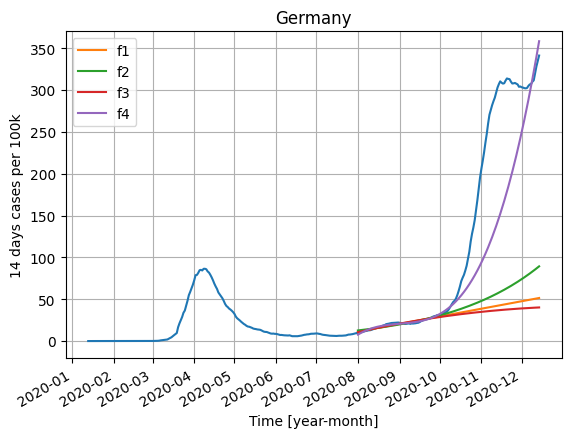

In [13]:
param_1, _ = scipy.optimize.curve_fit(fun_1, x_cases, y_cases)
param_2, _ = None, None  # fit fun_2
param_3, _ = None, None  # fit fun_3
param_4, _ = None, None  # fit fun_4

### BEGIN SOLUTION
param_2, _ = scipy.optimize.curve_fit(fun_2, x_cases, y_cases, p0=(0.05, 0, 1))
param_3, _ = scipy.optimize.curve_fit(fun_3, x_cases, y_cases)
param_4, _ = scipy.optimize.curve_fit(fun_4, x_cases, y_cases)
### END SOLUTION

y_fit_1 = fun_1(x_test_days, *param_1)
y_fit_2 = None  # evalute fit 2
y_fit_3 = None  # evalute fit 3
y_fit_4 = None  # evalute fit 4

### BEGIN SOLUTION
y_fit_2 = fun_2(x_test_days, *param_2)
y_fit_3 = fun_3(x_test_days, *param_3)
y_fit_4 = fun_4(x_test_days, *param_4)
### END SOLUTION

fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.plot(x_test, y_fit_1, label="f1")  # plot data

### BEGIN SOLUTION
ax.plot(x_test, y_fit_2, label="f2")  # plot data
ax.plot(x_test, y_fit_3, label="f3")  # plot data
ax.plot(x_test, y_fit_4, label="f4")  # plot data
### END SOLUTION

ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.ylim([-20, 370])

plt.legend()
plt.title("Germany")
plt.ylabel("14 days cases per 100k")
plt.xlabel("Time [year-month]")

plt.show()  # make plot

- (1) Welche Funktion extrapoliert am besten über den 01.10.2020 bis zum Ende des Jahres?
- (2) Ändert sich das, wenn du nur an die letzten 14 Tage vom 17.09.2020 bis zum 01.10.2020 fittest?

In [14]:
answer_best_fun = None  # Beste Funktion für die erste Frage (int)?
answer_best_fun_14_days = None  # Welche Funktion ist im zweiten Fall (2) am besten? (int)

### BEGIN SOLUTION
answer_best_fun = 4
answer_best_fun_14_days = 2
### END SOLUTION

**Das war es auch schon für das erste Übungsblatt.**

**Nun folgen noch ein paar Checks für dich, mit welchen du deine Ergebnis grob überprüfen kannst:**

In [15]:
assert isinstance(countries, list) or isinstance(countries, np.ndarray)
assert isinstance(rel_deaths, dict)
assert isinstance(population, dict)
assert isinstance(deaths, dict)
assert isinstance(country_max_mortality, str)

In [16]:
assert isinstance(cum_death, np.ndarray)
assert isinstance(cum_cases, np.ndarray)

In [17]:
assert fun_1(0, 0, 0) == 0
assert fun_2(0, 0, 0, 0) == 0
assert fun_3(0, 0, 0, 0) == 0
assert fun_4(0, 0, 0, 0, 0) == 0

In [18]:
assert param_1 is not None
assert param_2 is not None
assert param_3 is not None
assert param_4 is not None
assert isinstance(answer_best_fun, int)
assert isinstance(answer_best_fun_14_days, int)